# Generative Adversarial Network

In [1]:
import numpy as np
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline  
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))

# Device Configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("This notebook use [%s]."%(device))

PyTorch version:[1.7.0].
This notebook use [cuda:0].


# Set hyper-parameter

In [2]:
EPOCHS = 100
LATENT_SIZE = 100
BATCH_SIZE = 64
LEARNING_RATE = 0.002

# Prepare dataset

In [3]:
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.5], std=[0.5])])
# MNIST dataset
mnist_train = datasets.MNIST(root='./data/', train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root='./data/', train=False, transform=transform, download=True)

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=BATCH_SIZE, shuffle=True, num_workers=1)

print("Preparing dataset done!")

Preparing dataset done!


# Defining Model

In [4]:
# our model
class Generator(nn.Module):
    def __init__(self, latent_size=100, output_size=784):
        super(Generator, self).__init__()
        self.linear1 = nn.Linear(latent_size, 256)
        self.bnorm1 = nn.BatchNorm1d(256)
        self.linear2 = nn.Linear(256, 512)
        self.bnorm2 = nn.BatchNorm1d(512)
        self.linear3 = nn.Linear(512, output_size)
        
    def forward(self, X):
        X = F.relu(self.bnorm1(self.linear1(X)))
        X = F.relu(self.bnorm2(self.linear2(X)))
        X = torch.tanh(self.linear3(X))
        return X
    
class Discriminator(nn.Module):
    def __init__(self, input_size=784):
        super(Discriminator, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 64)
        self.linear3 = nn.Linear(64, 1)
    
    def forward(self, X):
        X = F.leaky_relu(self.linear1(X), 0.002)
        X = F.leaky_relu(self.linear2(X), 0.002)
        X = torch.sigmoid(self.linear3(X))
        return X

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=LEARNING_RATE)
g_optimizer = optim.Adam(G.parameters(), lr=LEARNING_RATE)

# Calculate Parameters

In [5]:
G_params = 0
for param_name, param in G.named_parameters():
    if param.requires_grad:
        G_params += len(param.reshape(-1))
print(f"Number of Generator's Parameters: {G_params:,d}")

D_params = 0
for param_name, param in D.named_parameters():
    if param.requires_grad:
        D_params += len(param.reshape(-1))
print(f"Number of Discriminator's Parameters: {D_params:,d}")

Number of Generator's Parameters: 561,168
Number of Discriminator's Parameters: 217,473


# Define help function

In [6]:
def plot_generator(gen_model, num = 10, latent_size=100):
    z = torch.randn(num, latent_size).to(device)

    gen_model.eval()
    test_g = gen_model.forward(z)
    gen_model.train()

    plt.figure(figsize=(8, 2))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(test_g[i].view(28, 28).data.cpu().numpy(), cmap=plt.cm.gray)
        plt.axis('off')
    plt.show()

# Train model 

Start training !
Epoch: 1, G_loss: 0.1631990522146225, D_loss: 0.003000358585268259
Epoch: 2, G_loss: 0.07934295386075974, D_loss: 0.010300696827471256
Epoch: 3, G_loss: 0.04613476246595383, D_loss: 0.0062529100105166435
Epoch: 4, G_loss: 0.05582614988088608, D_loss: 0.005993734113872051
Epoch: 5, G_loss: 0.057128652930259705, D_loss: 0.004380781669169664


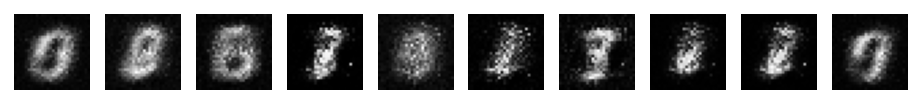

Epoch: 6, G_loss: 0.057944659143686295, D_loss: 0.004386205691844225
Epoch: 7, G_loss: 0.05906275287270546, D_loss: 0.003769604256376624
Epoch: 8, G_loss: 0.052236031740903854, D_loss: 0.004416131414473057
Epoch: 9, G_loss: 0.04455345496535301, D_loss: 0.0049658226780593395
Epoch: 10, G_loss: 0.04208876192569733, D_loss: 0.0051014600321650505


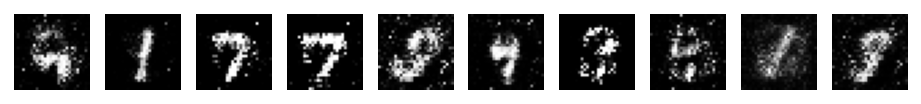

Epoch: 11, G_loss: 0.04223891720175743, D_loss: 0.005255391355603933
Epoch: 12, G_loss: 0.044705189764499664, D_loss: 0.005305383820086718
Epoch: 13, G_loss: 0.04036058485507965, D_loss: 0.00544312410056591
Epoch: 14, G_loss: 0.03630569577217102, D_loss: 0.00582807045429945
Epoch: 15, G_loss: 0.03530006483197212, D_loss: 0.005913516506552696


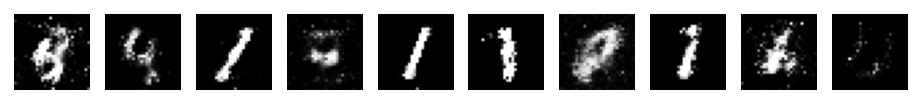

Epoch: 16, G_loss: 0.03490405157208443, D_loss: 0.005891953594982624
Epoch: 17, G_loss: 0.03440079092979431, D_loss: 0.005912819877266884
Epoch: 18, G_loss: 0.03537730872631073, D_loss: 0.006168837659060955
Epoch: 19, G_loss: 0.03558764606714249, D_loss: 0.005985310301184654
Epoch: 20, G_loss: 0.032084472477436066, D_loss: 0.005957467947155237


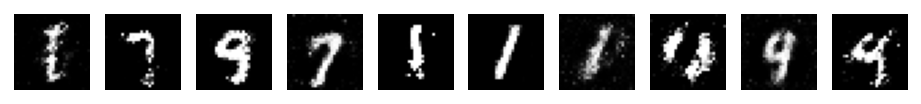

Epoch: 21, G_loss: 0.03251194208860397, D_loss: 0.006014877464622259
Epoch: 22, G_loss: 0.03228229284286499, D_loss: 0.00588857801631093
Epoch: 23, G_loss: 0.03134940192103386, D_loss: 0.006128769367933273
Epoch: 24, G_loss: 0.03160303086042404, D_loss: 0.006259610410779715
Epoch: 25, G_loss: 0.03251708298921585, D_loss: 0.0060736085288226604


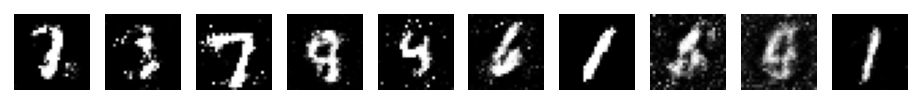

Epoch: 26, G_loss: 0.03146347776055336, D_loss: 0.00623787147924304
Epoch: 27, G_loss: 0.03162842616438866, D_loss: 0.006306980736553669
Epoch: 28, G_loss: 0.030478401109576225, D_loss: 0.0063584293238818645
Epoch: 29, G_loss: 0.029956499114632607, D_loss: 0.006527452729642391
Epoch: 30, G_loss: 0.030278712511062622, D_loss: 0.006586307194083929


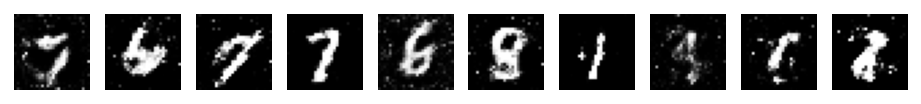

Epoch: 31, G_loss: 0.029792968183755875, D_loss: 0.006585557479411364
Epoch: 32, G_loss: 0.029436839744448662, D_loss: 0.006566769443452358
Epoch: 33, G_loss: 0.02901327982544899, D_loss: 0.006535930559039116
Epoch: 34, G_loss: 0.028863942250609398, D_loss: 0.0064410921186208725
Epoch: 35, G_loss: 0.029654597863554955, D_loss: 0.006401537451893091


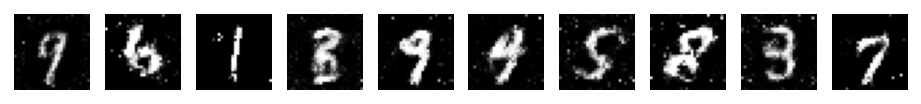

Epoch: 36, G_loss: 0.028680196031928062, D_loss: 0.006490293424576521
Epoch: 37, G_loss: 0.02988017164170742, D_loss: 0.006356041878461838
Epoch: 38, G_loss: 0.030033795163035393, D_loss: 0.006543498486280441
Epoch: 39, G_loss: 0.02917279116809368, D_loss: 0.0064314729534089565
Epoch: 40, G_loss: 0.03016095981001854, D_loss: 0.006487832870334387


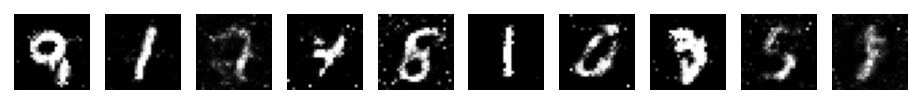

Epoch: 41, G_loss: 0.028069214895367622, D_loss: 0.006453104317188263
Epoch: 42, G_loss: 0.028489263728260994, D_loss: 0.006467119324952364
Epoch: 43, G_loss: 0.028845101594924927, D_loss: 0.006492704153060913
Epoch: 44, G_loss: 0.02811749465763569, D_loss: 0.00665894104167819
Epoch: 45, G_loss: 0.027694454416632652, D_loss: 0.006535392254590988


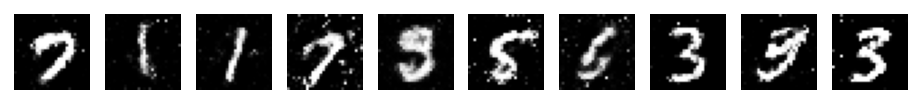

Epoch: 46, G_loss: 0.02700715884566307, D_loss: 0.006728142965584993
Epoch: 47, G_loss: 0.027146754786372185, D_loss: 0.006747069768607616
Epoch: 48, G_loss: 0.027883309870958328, D_loss: 0.006680822931230068
Epoch: 49, G_loss: 0.02759360708296299, D_loss: 0.006674416828900576
Epoch: 50, G_loss: 0.027754604816436768, D_loss: 0.0065979622304439545


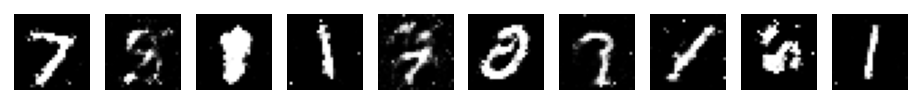

Epoch: 51, G_loss: 0.02693937160074711, D_loss: 0.006665102671831846
Epoch: 52, G_loss: 0.02731058932840824, D_loss: 0.006651062984019518
Epoch: 53, G_loss: 0.026925103738904, D_loss: 0.006647355388849974
Epoch: 54, G_loss: 0.026892030611634254, D_loss: 0.006697457283735275
Epoch: 55, G_loss: 0.026453202590346336, D_loss: 0.0066130924969911575


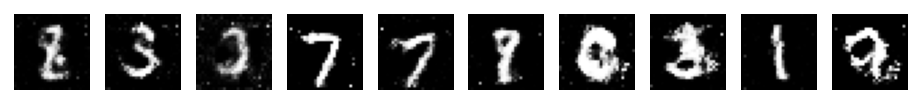

Epoch: 56, G_loss: 0.027094591408967972, D_loss: 0.006579272449016571
Epoch: 57, G_loss: 0.026293408125638962, D_loss: 0.006621288601309061
Epoch: 58, G_loss: 0.02707875519990921, D_loss: 0.006630201358348131
Epoch: 59, G_loss: 0.02700306661427021, D_loss: 0.006537947338074446
Epoch: 60, G_loss: 0.027032028883695602, D_loss: 0.006597266532480717


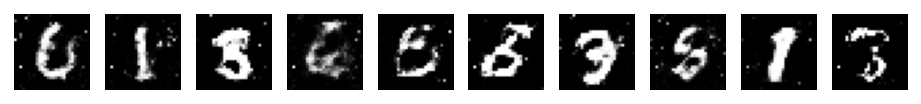

Epoch: 61, G_loss: 0.02669931948184967, D_loss: 0.006674763280898333
Epoch: 62, G_loss: 0.02657342702150345, D_loss: 0.006667396053671837
Epoch: 63, G_loss: 0.02694721147418022, D_loss: 0.006758684758096933
Epoch: 64, G_loss: 0.026516743004322052, D_loss: 0.006657545920461416
Epoch: 65, G_loss: 0.026531435549259186, D_loss: 0.006652920972555876


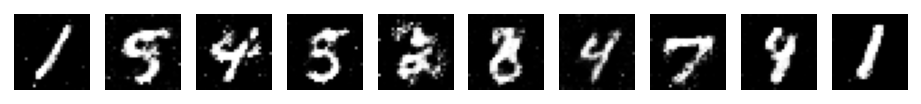

Epoch: 66, G_loss: 0.02649313397705555, D_loss: 0.006718038581311703
Epoch: 67, G_loss: 0.02598446048796177, D_loss: 0.006737768184393644
Epoch: 68, G_loss: 0.026771975681185722, D_loss: 0.006621461361646652
Epoch: 69, G_loss: 0.026592304930090904, D_loss: 0.00660907244309783
Epoch: 70, G_loss: 0.02707352302968502, D_loss: 0.006637240760028362


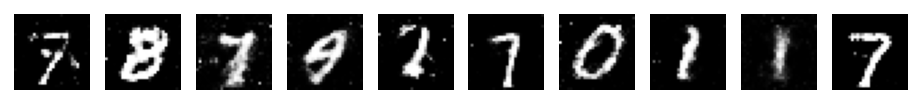

Epoch: 71, G_loss: 0.02663682959973812, D_loss: 0.006562942173331976
Epoch: 72, G_loss: 0.026389406993985176, D_loss: 0.0066867368295788765
Epoch: 73, G_loss: 0.026519300416111946, D_loss: 0.00662055891007185
Epoch: 74, G_loss: 0.02660180628299713, D_loss: 0.006597457453608513
Epoch: 75, G_loss: 0.026970377191901207, D_loss: 0.006603511981666088


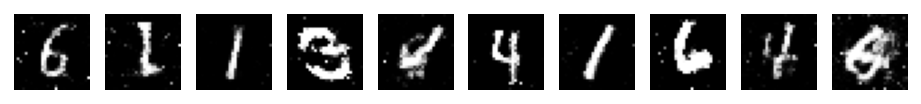

Epoch: 76, G_loss: 0.02702825888991356, D_loss: 0.006571660749614239
Epoch: 77, G_loss: 0.026476457715034485, D_loss: 0.006560942158102989
Epoch: 78, G_loss: 0.02681601420044899, D_loss: 0.006502834614366293
Epoch: 79, G_loss: 0.02720707468688488, D_loss: 0.0065462528727948666
Epoch: 80, G_loss: 0.02729870192706585, D_loss: 0.006474991329014301


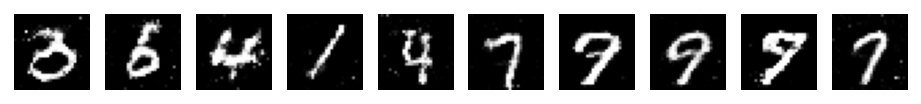

Epoch: 81, G_loss: 0.027202412486076355, D_loss: 0.0065043228678405285
Epoch: 82, G_loss: 0.026309547945857048, D_loss: 0.006593011319637299
Epoch: 83, G_loss: 0.027232978492975235, D_loss: 0.006515934597700834
Epoch: 84, G_loss: 0.026476915925741196, D_loss: 0.0065460847690701485
Epoch: 85, G_loss: 0.02661937288939953, D_loss: 0.006535673979669809


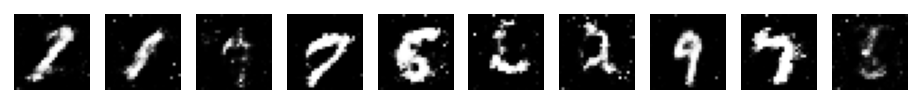

Epoch: 86, G_loss: 0.027333714067935944, D_loss: 0.00650209654122591
Epoch: 87, G_loss: 0.026596074923872948, D_loss: 0.0064733815379440784
Epoch: 88, G_loss: 0.026662148535251617, D_loss: 0.00661380123347044
Epoch: 89, G_loss: 0.026315469294786453, D_loss: 0.006542640272527933
Epoch: 90, G_loss: 0.0268168356269598, D_loss: 0.006569096818566322


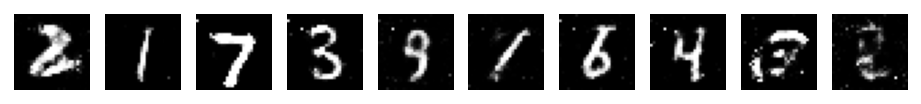

Epoch: 91, G_loss: 0.02648317627608776, D_loss: 0.006545569747686386
Epoch: 92, G_loss: 0.026769233867526054, D_loss: 0.00649948650971055
Epoch: 93, G_loss: 0.02680237777531147, D_loss: 0.006545818876475096
Epoch: 94, G_loss: 0.02695673517882824, D_loss: 0.006505641154944897
Epoch: 95, G_loss: 0.027236972004175186, D_loss: 0.00641170609742403


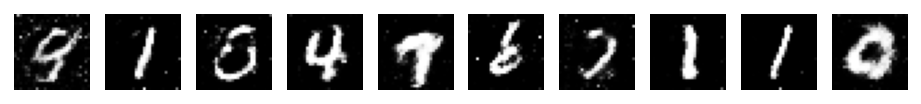

Epoch: 96, G_loss: 0.026150071993470192, D_loss: 0.006581256166100502
Epoch: 97, G_loss: 0.026819774881005287, D_loss: 0.0065066153183579445
Epoch: 98, G_loss: 0.026959169656038284, D_loss: 0.006434621289372444
Epoch: 99, G_loss: 0.026845932006835938, D_loss: 0.006477404851466417


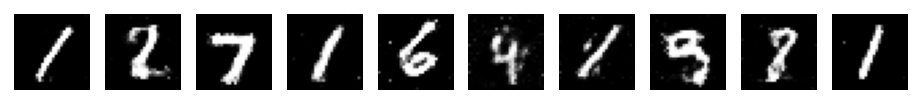

Epoch: 100, G_loss: 0.026802608743309975, D_loss: 0.006434696726500988


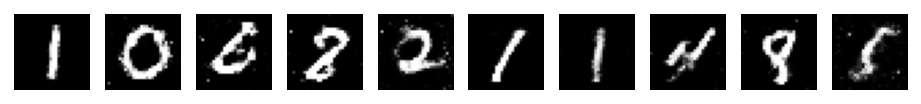

Training Done !


In [7]:
# Training Phase
print_every = 1
plot_every = 5
print("Start training !")

# Training loop
for epoch in range(EPOCHS):
    total = 0
    g_loss_val_sum = 0
    d_loss_val_sum = 0
    for batch_img, _ in train_iter:

        X = batch_img.view(batch_img.size(0), -1).to(device)

        real_lab = torch.ones(batch_img.size(0), 1).to(device)
        
        fake_lab = torch.zeros(batch_img.size(0), 1).to(device)
        
        # Training Discriminator
        D_pred = D.forward(X)
        d_loss_real = criterion(D_pred, real_lab)
        
        z = torch.randn(batch_img.size(0), LATENT_SIZE).to(device)
        
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        d_loss_fake = criterion(G_pred, fake_lab)
        
        d_loss = (d_loss_real + d_loss_fake)/2.
        d_loss_val_sum += d_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
        
        
        # Training Generator
        z = torch.randn(batch_img.size(0), LATENT_SIZE).to(device)
        fake_images = G.forward(z)
        G_pred = D.forward(fake_images)
        g_loss = criterion(G_pred, real_lab)
        g_loss_val_sum += g_loss

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()
        
        total += X.size(0)
        
    if (((epoch+1)%print_every)==0) or ((epoch+1)==(EPOCHS-1)):
            print(f"Epoch: {epoch+1}, G_loss: {g_loss_val_sum/total}, D_loss: {d_loss_val_sum/total}")
    if (((epoch+1)%plot_every)==0) or ((epoch+1)==(EPOCHS-1)):
        plot_generator(G, num=10, latent_size=LATENT_SIZE)
print("Training Done !")